In [1]:
import random
import string
import copy
import numpy as np
import random as rd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
values_representation = list(np.arange(48,58)) #maiusculos
values_representation += list(np.arange(65,91))#minusculos
values_representation += [42] #*

In [ ]:
def get_random_string(length=28):
    # choose from all lowercase letter
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

def add_random_asterisk(word):
    number_of_asterisks = random.randint(0,len(word))
    for asterisk in range(number_of_asterisks):
        random_idx = random.randint(0,len(word)-1)
        word_to_list = list(word)
        word_to_list[random_idx] = '*'
        word = "".join(word_to_list)
    return word

In [2]:
# gerar pop.

def generate_pop(pop_size):
    pop = []
    for being in range(pop_size):
        pop.append(add_random_asterisk(get_random_string()))
    return pop

In [3]:
# converter de char para int (ascii)

def word_to_integer_vector(word):
    return list(map(lambda x: ord(x),list(word)))

def w2c_entire_pop(pop):
    return list(map(lambda x: word_to_integer_vector(x), pop))

def integer_to_word_vector(vector):
    return ''.join(list(map(lambda x: chr(x),vector)))

def c2w_entire_pop(pop):
    return list(map(lambda x: integer_to_word_vector(x), pop))

In [4]:
# função de custo
# soma das diferenças entre os valores das duas strings
def fitness_nq(int_vec_word, target="METHINKS*IT*IS*LIKE*A*WEASEL"):
    int_target = word_to_integer_vector(target)
    return np.sum(np.abs(int_vec_word - int_target))

# recebe vetor de ints (que representa uma palavra)
def evaluate_loss_function(int_vec_word, target="METHINKS*IT*IS*LIKE*A*WEASEL"):
    print(f"Word:   {integer_to_word_vector(int_vec_word)}\n")
    print(f"Target: {target}\n")
    result = []
    int_target = word_to_integer_vector(target)
    for i in range(len(int_vec_word)):
        result.append(np.abs(int_vec_word[i] - int_target[i]))
    return np.sum(result)

In [5]:
# mutação
# escolhe posição aleatória e troca char.

def get_caract_random():
    p = random.randint(0,len(values_representation)-1)
    return values_representation[p]

# mudei o if pra dentro do laço
def mutation(offspring, mutation_rate):
    size_ind = len(offspring[0])
    population_copy = copy.copy(offspring)
    for i in range(len(population_copy)):
        if float(random.randint(0, 10))/10 <= mutation_rate:
            loc = random.randint(0,size_ind-1)
            mut = get_caract_random()
            population_copy[i,loc] = mut
    return population_copy

In [6]:
# selecionar os melhores indivíudos (ranking dos indivíduos)
# no caso, isso não vai ser feito
# cruzaremos todos os indivíduos
# se ficar ruim, tentamos outra abordagem: tipo ordear indivíduos e cruzar melhores entre si.

# chegamos na conclusão que não faz muito sentido, tendo em vista que não estamosa forçando seleção natural.
# vamos fazer igual fizemos nos outros 

def selection(population, cut, k = 5):
    scores = []
    # escolhendo k indivíduos aleatórios     
    for individual in random.choices(population, k=k):
        fitness_score = fitness_nq(individual)
        scores.append((fitness_score, individual))
    sorted_scores = sorted(scores, key=lambda tup: tup[0])
    best_ones = sorted_scores[:cut] 
    return list(map(lambda x: x[1], best_ones))

In [7]:
# cross (reprodução)
# recebe dois indivíduos e gera dois filhos 
# um ponto de corte aleatório
#valores pares
def crossover(subset_parents, cross_over_rate):
    
    new_ = []
    if float(rd.randint(0, 10))/10 <= cross_over_rate:
        size_n = len(subset_parents[0])
        for i in range(0,int(len(subset_parents)/2),2):
            cut_v = random.randint(1, size_n-1)
            son1 = np.concatenate((subset_parents[i][0:cut_v], subset_parents[i+1][cut_v:]))
            son2 = np.concatenate((subset_parents[i+1][0:cut_v], subset_parents[i][cut_v:]))
            new_.append(son1)
            new_.append(son2)
    else:
        new_ = subset_parents
        
    return np.array(new_)

In [8]:
### Seleção natural sustituir os piores pelos melhores
def replacement(offspring_new, pop):
    pop = np.concatenate((pop,offspring_new), axis=0)
    #todos na mesma lista! Falta retirar os n piores ###Seleção dos melhores para continuar
    evaluate_v = []
    for indv in pop:
        evaluate_v.append(fitness_nq(indv))
    
    sorted_ = sorted(range(len(evaluate_v)), key=evaluate_v.__getitem__)
    pop_order = pop[sorted_]
    
    pop_order = pop_order[:-len(offspring_new)]
    
    return pop_order

## Run

In [9]:
pop = generate_pop(200)
cross_over_rate = 0.7
mutation_rate = 0.7
n_inter_max = 1000
cut = 40
k = 100
pop = np.array(w2c_entire_pop(pop))
pop

array([[ 77, 112,  42, ...,  87, 112,  42],
       [119,  89, 102, ...,  72, 112, 111],
       [ 42, 109, 121, ...,  42,  77,  42],
       ...,
       [105,  74,  42, ...,  90,  79,  42],
       [ 65,  81,  72, ..., 115,  88, 118],
       [ 42,  81, 103, ..., 107,  70,  42]])

In [10]:
sol = []
n_iter = 0
fitness_avg = []
best_of_generation = []
smallest_fitness = 1000

while n_iter < n_inter_max and smallest_fitness > 0:
    
    subset_parents = selection(pop, cut, k = k)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    fitness_scores = []
    last = fitness_nq(pop[0])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if last < smallest_fitness:
            smallest_fitness = last
            sol = copy.copy(pop[0])
    

    best_of_generation.append(smallest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
    
    if n_iter%40 == 0:
        print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
    n_iter += 1

print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {smallest_fitness}")

Fitness da geração menor valor 0: 458

Fitness da geração menor valor 40: 140

Fitness da geração menor valor 80: 72

Fitness da geração menor valor 120: 35

Fitness da geração menor valor 160: 23

Fitness da geração menor valor 200: 17

Fitness da geração menor valor 240: 12

Fitness da geração menor valor 280: 9

Fitness da geração menor valor 320: 7

Fitness da geração menor valor 360: 3

Fitness da geração menor valor 400: 1

Fitness da geração menor valor 428: 0

Melhor solução encontrada: [77 69 84 72 73 78 75 83 42 73 84 42 73 83 42 76 73 75 69 42 65 42 87 69
 65 83 69 76]
Fitness da melhor solução encontrada: 0


In [14]:
print('Solution')
print('Número de interações: {}'.format(n_iter))
print(f"Result: {integer_to_word_vector(sol)}")

Solution
Número de interações: 428
Result: METHINKS*IT*IS*LIKE*A*WEASEL


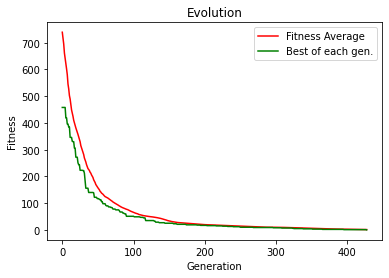

In [12]:
# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()